<a href="https://colab.research.google.com/github/nirmal428/MachineLearning/blob/main/FeatureEngineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feature Engineering is the process of creating, modifying, or selecting features (variables) from raw data to improve the performance of a machine learning model. It helps models understand patterns better by transforming data into a more suitable format.



1.   **Missing value**
2.   **Imbalance Data**
3.   **SMOTE**
4.   **Data Interpolation**
5.   **Handling Outliers**
6.   **Feature Extraction**
7.   **Data Encoding**



# Missing Value


In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
#check missing value

df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [5]:
# hanlding missing value by deleting null value / delete row-wise
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [6]:
df.shape

(891, 15)

In [7]:
#column wiae delete
df.dropna(axis=1)

,survived,pclass,sex,sibsp,parch,fare,class,who,adult_male,alive,alone
0,0,3,male,1,0,7.2500,Third,man,True,no,False
1,1,1,female,1,0,71.2833,First,woman,False,yes,False
2,1,3,female,0,0,7.9250,Third,woman,False,yes,True
3,1,1,female,1,0,53.1000,First,woman,False,yes,False
4,0,3,male,0,0,8.0500,Third,man,True,no,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,0,0,13.0000,Second,man,True,no,True
887,1,1,female,0,0,30.0000,First,woman,False,yes,True
888,0,3,female,1,2,23.4500,Third,woman,False,no,False
889,1,1,male,0,0,30.0000,First,man,True,yes,True


In [8]:
df=sns.load_dataset('titanic')
df.shape

(891, 15)

# Imbalance Data

In [9]:
import numpy as np
import pandas as pd

In [10]:
np.random.seed(123)
n_sample=1000
class_0_ratio=0.9
n_class_0=int(n_sample*class_0_ratio)
n_class_1=n_sample-n_class_0

In [11]:
n_class_0,n_class_1

(900, 100)

In [12]:
class_0=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1=pd.DataFrame({
    'feature1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

In [13]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [14]:
df['target'].value_counts()

,count
target,
0,900
1,100


*Upsampling  -*

**add same minority-data points on the minority dataset for maximize the minority data points**



In [15]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [16]:
df_minority.head()

,feature1,feature2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1


In [17]:
print(df_majority.head())

   feature1  feature2  target
0 -1.085631  0.551302       0
1  0.997345  0.419589       0
2  0.282978  1.815652       0
3 -1.506295 -0.252750       0
4 -0.578600 -0.292004       0


In [18]:
#perform upscaling

from sklearn.utils import resample

In [19]:
df_minority_upsample=resample(df_minority,
                              replace=True, #sample with replacement
                              n_samples=len(df_majority), #to match the majority class
                              random_state=42)

In [20]:
df_minority_upsample.shape

(900, 3)

In [21]:
df_minority_upsample['target'].value_counts()

,count
target,
1,900


In [22]:
df_upsampling=pd.concat([df_majority,df_minority_upsample])

In [23]:
df_upsampling.head()

,feature1,feature2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [24]:
df_upsampling.shape

(1800, 3)

*downsampling -* reduce the maximum data point

In [25]:
class_0=pd.DataFrame({
    'feature1':np.random.normal(loc=0,scale=1,size=n_class_0),
    'feature2':np.random.normal(loc=0,scale=1,size=n_class_0),
    'target':[0]*n_class_0
})

class_1=pd.DataFrame({
    'feature1':np.random.normal(loc=2,scale=1,size=n_class_1),
    'feature2':np.random.normal(loc=2,scale=1,size=n_class_1),
    'target':[1]*n_class_1
})

In [26]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [27]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [28]:
df_majority_downsample=resample(df_minority,
                              replace=False, #sample without replacement
                              n_samples=len(df_minority), #to match the minority class
                              random_state=42)

In [29]:
df_majority_downsample.shape

(100, 3)

In [30]:
pd.concat([df_minority,df_majority_downsample])

,feature1,feature2,target
900,-0.643425,2.571923,1
901,1.551009,1.782767,1
902,1.641093,2.054318,1
903,2.133194,2.155998,1
904,1.355758,2.467810,1
...,...,...,...
960,2.456515,1.833528,1
971,2.819483,2.964646,1
914,1.927957,2.280911,1
992,2.000977,1.814833,1


# SMOTE

SMOTE in ML refers to Synthetic Minority Over-sampling Technique.
It is a popular technique used in handling imbalanced datasets, especially in classification problems where one class (minority) has significantly fewer samples compared to the other class (majority).

In [31]:
from sklearn.datasets import make_classification

In [32]:
x,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [33]:
import pandas as pd
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
final_df=pd.concat([df1,df2],axis=1)

In [34]:
x

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [35]:
x.shape

(1000, 2)

In [36]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

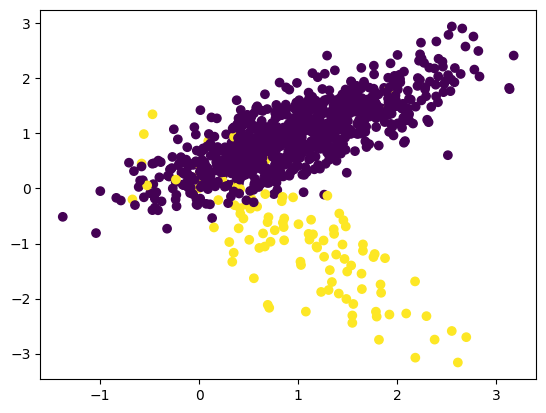

In [37]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

Apply **SMOTE**

In [38]:
!pip install  imblearn

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
##  transform the dataset
oversample=SMOTE()
x,y=oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [41]:
x.shape

(1788, 2)

In [42]:
y.shape

(1788,)

In [43]:
len(y[y==0])

894

In [44]:
len(y[y==1])

894

In [45]:
import pandas as pd
df1=pd.DataFrame(x,columns=['f1','f2'])
df2=pd.DataFrame(y,columns=['target'])
oversample_df=pd.concat([df1,df2],axis=1)


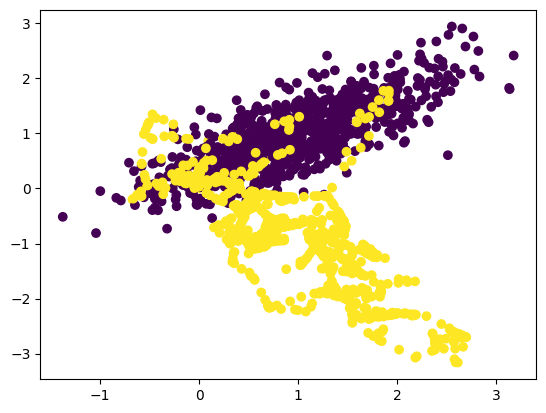

In [46]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c=oversample_df['target'])

#Data Interpolation




Data interpolation is a statistical and mathematical technique used to **estimate unknown values within the range of a set of known data points.** It helps in **predicting missing or intermediate values** in a dataset by assuming a relationship between existing data points.

**Key Points :**

**Purpose**: To fill gaps in data or smooth datasets for better analysis.

**Input**: A set of known data points (e.g., measurements at specific times).

**Output**: Estimated values between those known points.

**Types of Interpolation  :**

**Linear Interpolation :** Connects two known points with a straight line and estimates intermediate values.

**Polynomial Interpolation :** Uses polynomials to approximate data points.

**Spline Interpolation :** Uses piecewise polynomials (splines) for smoother curves.

**Example :**

If temperature is known at 10 AM (20°C) and 12 PM (24°C), interpolation can estimate the temperature at 11 AM (≈22°C).


In [47]:
import numpy as np
x=np.array([1,2,3,4,5,])
y=np.array([2,4,6,8,10])

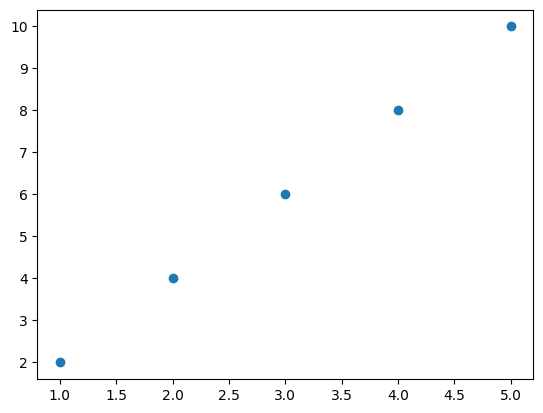

In [48]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [49]:
# Interpolate the data using Linear interpolation
x_new=np.linspace(1,5,10) #create new x values
y_new=np.interp(x_new,x,y) #interpolate y values at new x values
print(y_new)

[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


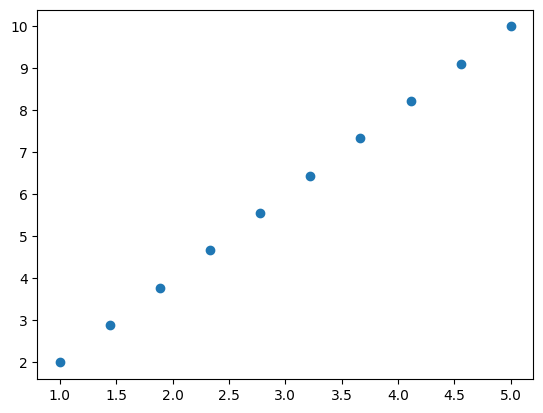

In [50]:
plt.scatter(x_new,y_new)

Cubic Interpotation with Scipy

In [51]:
#using Scipy
x=np.array([1,2,3,4,5,])
y=np.array([1,4,9,16,25])

In [52]:
from scipy.interpolate import interp1d

In [53]:
#create a cubic interpoltaion function
f=interp1d(x,y,kind='cubic')

In [54]:
x_new=np.linspace(1,5,10)
y_new=f(x_new)
print(y_new)

[ 1.          2.08641975  3.56790123  5.44444444  7.71604938 10.38271605
 13.44444444 16.90123457 20.75308642 25.        ]


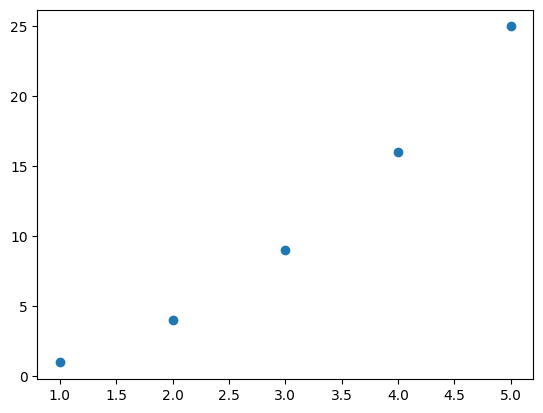

In [55]:
plt.scatter(x,y)


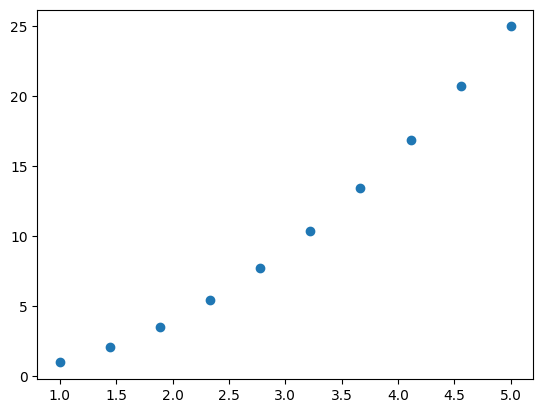

In [56]:
plt.scatter(x_new,y_new)

# Handling Outliers

**Outliers** are data points that are much higher or lower than the rest of the data.

**Example:**

Consider exam scores: **45, 48, 50, 52, 49, 150**
Here, **150** is an outlier because it is far from the other scores.

Outliers can **skew averages**, mislead analysis, or indicate special cases (e.g., fraud, errors, or rare events).
___________________________________________

*5 Number Summary*


a. Minimum value

b. Q1 - 25 percentile

c. Median

d. Q3- 75 percentile

e. Maximum

In [57]:
import numpy as np

In [58]:
lst_makrs=[42,41,39,45,50,49,38,32,88,92,90,81,78,60,55,70,74,67,80,1000,1200]

In [59]:
np.percentile(lst_makrs,[25])

array([45.])

In [60]:
# [ lower fence <-----> Higher fence]
Q1=np.percentile(lst_makrs,[25])
print(Q1)

[45.]


In [61]:
minimum,Q1,Q2,Q3,maximum=np.quantile(lst_makrs,[0,0.25,0.50,0.75,1.00])

In [62]:
maximum

np.float64(1200.0)

In [63]:
IQR=Q3-Q1
print(IQR)

36.0


In [64]:
lower_fence=Q1-1.5*IQR
higher_fence=Q3+1.5*IQR

In [65]:
lower_fence

np.float64(-9.0)

In [66]:
higher_fence

np.float64(135.0)

In [67]:
outliers=[]
for i in lst_makrs:
  if i>=-14.375 and i <= 146.625:
    print("This is not an outlier")
  else:
    outliers.append(i)
    print("This is an outlier")

This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is not an outlier
This is an outlier
This is an outlier


In [68]:
outliers

[1000, 1200]

In [69]:
import seaborn as sns

<Axes: >

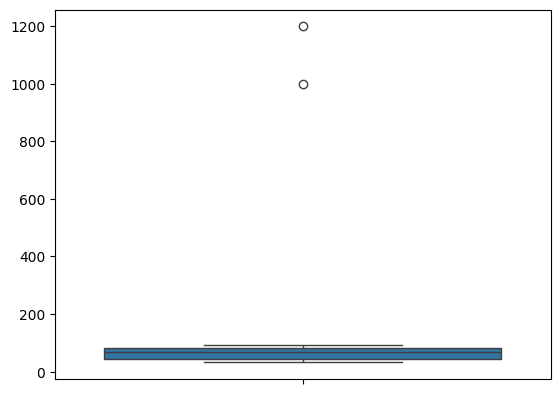

In [70]:
sns.boxplot(lst_makrs)

In [71]:
lst_makrs=[42,41,39,45,50,49,38,32,88,92,90,81,78,60,55,70,74,67,80]

<Axes: >

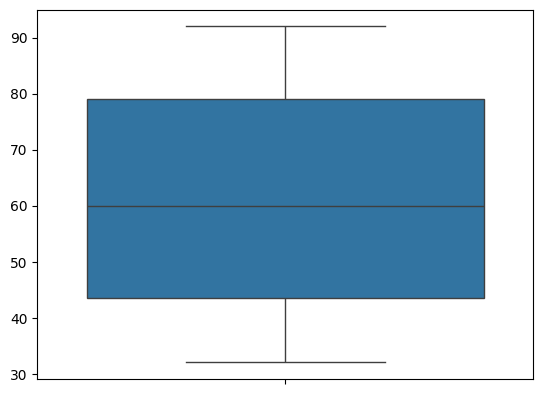

In [72]:
sns.boxplot(lst_makrs)

# Feature Extraction

Feature Extraction is process of selecting and extracking the more importance feature from row data.

⭐**Feature Sacling  -->** Feature scaling is a data preprocessing technique used to adjust the range of independent variables (features) so they are on a similar scale. It helps improve the performance and convergence speed of machine learning algorithms.

Example methods:

Normalization: Scales data between 0 and 1.

**Type ->**

1. Standardization (Z-score)

2. Min max Scaling(Normalization)

3. Unit Vector

> Add blockquote



▶**Standardization -->** most use in ML  

In [73]:
df=sns.load_dataset("tips")

In [74]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [75]:
total_bill=list(df['total_bill'])

<Axes: ylabel='Count'>

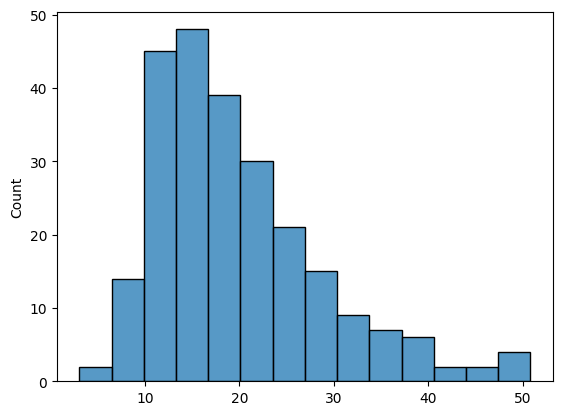

In [76]:
sns.histplot(total_bill)

In [77]:
mean=np.mean(total_bill)
std=np.std(total_bill)

In [78]:
mean,std

(np.float64(19.78594262295082), np.float64(8.884150577771132))

In [79]:
normalized_data=[]
for i in total_bill:
  z_score=(i-mean)/std   #z-score
  normalized_data.append(z_score)

print(normalized_data)


[np.float64(-0.3147113050904943), np.float64(-1.0632353132988692), np.float64(0.13777989987156145), np.float64(0.43831510316725475), np.float64(0.540744704290506), np.float64(0.6195367051545455), np.float64(-1.2399545152367863), np.float64(0.7985071071171495), np.float64(-0.5342033074974614), np.float64(-0.5634689078183903), np.float64(-1.0711145133852733), np.float64(1.7417599174609364), np.float64(-0.49143050702841123), np.float64(-0.15262490331304146), np.float64(-0.557840907756673), np.float64(0.2019391005751361), np.float64(-1.0643609133112126), np.float64(-0.3935033059545337), np.float64(-0.31696250511518104), np.float64(0.09725829942719795), np.float64(-0.2100305039425557), np.float64(0.05673669898283484), np.float64(-0.45203450659639155), np.float64(2.2100095225958003), np.float64(0.003833498402694168), np.float64(-0.2224121040783337), np.float64(-0.7221785095588127), np.float64(-0.7987193103981653), np.float64(0.21544630072325727), np.float64(-0.015301701807144186), np.float64

<Axes: ylabel='Count'>

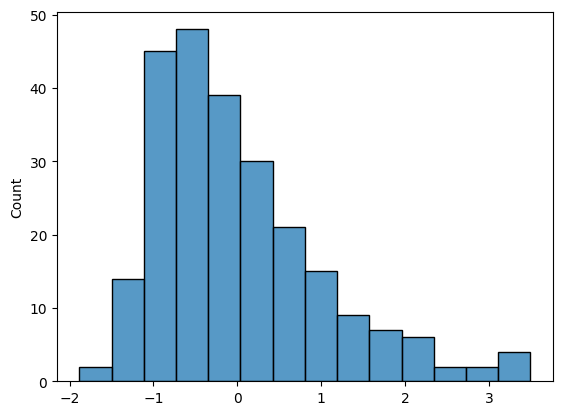

In [80]:
sns.histplot(normalized_data)

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler=StandardScaler()

In [83]:
scaler

StandardScaler()

In [84]:
scaler.fit(df[['total_bill','tip']])

StandardScaler()

▶**Normalization -->**

Min-Max sclaer --> use in deep learning

In [85]:
df=sns.load_dataset("taxis")
df.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [86]:
from sklearn.preprocessing import MinMaxScaler

In [87]:
min_max=MinMaxScaler()

In [88]:
min_max.fit(df[['distance','fare','tip']])

MinMaxScaler()

In [89]:
min_max.transform(df[['distance','fare','tip']])

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

▶**Unit Vector -->**

In [90]:
df=sns.load_dataset("iris")

In [91]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [92]:
from sklearn.preprocessing import normalize

In [93]:
normalize(df[['sepal_length','sepal_width','petal_length','petal_width']])

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [94]:
pd.DataFrame(normalize(df[['sepal_length','sepal_width','petal_length','petal_width']]),columns=['sepal_length','sepal_width','petal_length','petal_width'])

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


# Data Encoding

*Data Encoding is the process of transforming data into a specific format that can be efficiently stored, processed, or transmitted by computers and machine learning models. **It converts raw data (especially categorical or textual) into numerical or binary form**, as most algorithms work with numbers.*

**Types of Data Encoding -->**

▶**Label Encoding / Odinal  ->**  Assigns a unique integer to each category (e.g., Red = 0, Blue = 1, Green = 2).

▶**One-Hot Encoding / Nominal ->**  Creates binary columns for each category (e.g., Red = [1,0,0], Blue = [0,1,0], Green = [0,0,1]).

▶**Binary Encoding ->**  Converts category values into binary code (e.g., A = 00, B = 01, C = 10).

▶**Frequency/Count Encoding ->**  Replaces categories with their frequency/count in the dataset.

☄*Example :-*

For a column Color = [Red, Blue, Green]:

Label Encoding → [0, 1, 2]

One-Hot Encoding → [[1,0,0], [0,1,0], [0,0,1]]
________________________________________

♣  **One-Hot Encoding / Nominal**


In [95]:
from sklearn.preprocessing import OneHotEncoder

In [96]:
df=pd.DataFrame({
    'color':['red','blue','green','green','red','blue']
})

In [97]:
df


,color
0,red
1,blue
2,green
3,green
4,red
5,blue


In [98]:
ehe=OneHotEncoder()

In [100]:
encoded=ehe.fit_transform(df[['color']])

In [101]:
encoded

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (6, 3)>

In [103]:
encoded_df=pd.DataFrame(encoded.toarray(),columns=ehe.get_feature_names_out())

In [104]:
encoded_df

,color_blue,color_green,color_red
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,1.0,0.0,0.0


In [105]:
pd.concat([df,encoded_df],axis=1)

,color,color_blue,color_green,color_red
0,red,0.0,0.0,1.0
1,blue,1.0,0.0,0.0
2,green,0.0,1.0,0.0
3,green,0.0,1.0,0.0
4,red,0.0,0.0,1.0
5,blue,1.0,0.0,0.0


In [107]:
df=sns.load_dataset("tips")


In [108]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [109]:
from sklearn.preprocessing import OneHotEncoder

In [113]:
ohe=OneHotEncoder()

In [116]:
encoded_data=ohe.fit_transform(df[['day','sex','smoker','time']])

In [117]:
encoded_data

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 976 stored elements and shape (244, 10)>

In [119]:
encoded_df=pd.DataFrame(encoded_data.toarray(),columns=ohe.get_feature_names_out())

In [120]:
encoded_df

,day_Fri,day_Sat,day_Sun,day_Thur,sex_Female,sex_Male,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
240,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
241,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
242,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


♣ **Label / Ordinal Encoding**

In [123]:
df=pd.DataFrame({
    'color':['red','blue','green','green','red','blue']
})

In [121]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

In [122]:
encoder=LabelEncoder()

In [124]:
encoder.fit_transform(df['color'])

array([2, 0, 1, 1, 2, 0])

In [125]:
#Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder

In [126]:
df=pd.DataFrame({
    'size':['small','medium','large','medium','small','large']
})

In [128]:
encoder=OrdinalEncoder(categories=[['small','medium','large']])

In [129]:
encoder.fit_transform(df[['size']])

array([[0.],
       [1.],
       [2.],
       [1.],
       [0.],
       [2.]])